In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

from utils.ubx import filter_ubx_event

from utils.streams import populate_streams

%matplotlib inline
plt.style.use('ggplot')


In [2]:
from utils.EmotionalCitiesStreams import HarpStream
a = HarpStream(32, device = 'BioData', streamlabel = 'EnableStreams', root = r"C:\Users\neurogears\Desktop\ControlBenchmarkRun_empatica_harp_synch_2022_09_22_11_16_56")


,Value
Seconds,
2022-09-22 10:16:56.067488194,0
2022-09-22 10:16:57.056479931,15


In [2]:
## Local functions
def normalize_data(data_in):
    return (data_in - np.min(data_in))/ (np.max(data_in - np.min(data_in)))


In [3]:
stream_root_folder = r"C:\Users\neurogears\Desktop\ControlBenchmarkRun_empatica_harp_synch_2022_09_22_11_16_56"

#session_time = datetime.datetime.strptime(stream_root_folder.split('\\')[-1], '%Y_%m_%d_%H_%M_%S')
streams = populate_streams(stream_root_folder)

c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\20092022\Analysis\AnalysisCode\utils\dataloader.py:75: UserWarning: Harp stream with Id 227 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\20092022\Analysis\AnalysisCode\utils\dataloader.py:75: UserWarning: Harp stream with Id 228 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\20092022\Analysis\AnalysisCode\utils\dataloader.py:75: UserWarning: Harp stream with Id 229 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')
c:\Users\neurogears\Documents\git\EmotionalCities\benchmarks\20092022\Analysis\AnalysisCode\utils\dataloader.py:75: UserWarning: Harp stream with Id 232 not found
  warnings.warn(f'Harp stream with Id {streamID} not found')


### Attempt to load all datastreams to check data integrity

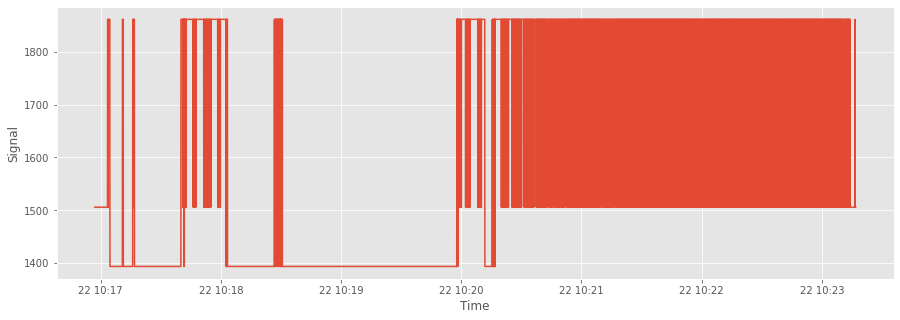

In [4]:
stream = streams.TK.AmbientLight.AmbientLight.data
fig = plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel("Signal")
plt.plot((stream))

(0.0, 1024.0)

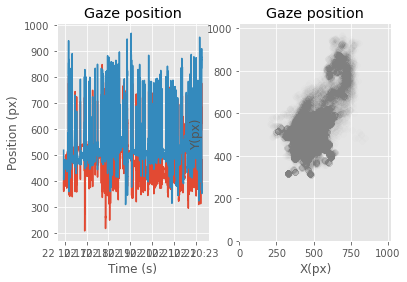

In [5]:
pupil_data = streams.PupilLabs.LSLSampleArray.data

ax1 = plt.subplot(121)
ax1.plot(pupil_data.index, pupil_data.iloc[:,0], label = "X")
ax1.plot(pupil_data.index,pupil_data.iloc[:,1], label = "Y")
ax1.set_ylabel("Position (px)")
ax1.set_xlabel("Time (s)")
ax1.set_title("Gaze position")

ax2 = plt.subplot(122)
ax2.scatter(pupil_data.iloc[:,0],pupil_data.iloc[:,1], c = "gray", alpha = 0.01)
ax2.set_ylabel("Y(px)")
ax2.set_xlabel("X(px)")
ax2.set_title("Gaze position")
ax2.set_ylim((0, 1024))
ax2.set_xlim((0, 1024))


In [7]:
streams.Ubx_data


Opening file C:\Users\neurogears\Desktop\ControlBenchmarkRun_empatica_harp_synch_2022_09_22_11_16_56\ubx.bin...
Done.


,Message,Identity,Class,Id,Length
Seconds,,,,,
2022-09-22 10:16:57.056990147,"<UBX(ESF-RAW, reserved1=843437329, data_01=b'V...",ESF-RAW,ESF,RAW,60
2022-09-22 10:16:57.056990147,"<UBX(ESF-RAW, reserved1=843437339, data_01=b'e...",ESF-RAW,ESF,RAW,60
2022-09-22 10:16:57.056990147,"<UBX(ESF-MEAS, timeTag=843437334, timeMarkSent...",ESF-MEAS,ESF,MEAS,24
2022-09-22 10:16:57.056990147,"<UBX(ESF-MEAS, timeTag=843437329, timeMarkSent...",ESF-MEAS,ESF,MEAS,28
2022-09-22 10:16:57.102980137,"<UBX(ESF-RAW, reserved1=843437349, data_01=b'~...",ESF-RAW,ESF,RAW,60
...,...,...,...,...,...
2022-09-22 10:23:16.834980011,"<UBX(MON-IO, rxBytes=0, txBytes=0, parityErrs=...",MON-IO,MON,IO,120
2022-09-22 10:23:16.835999966,"<UBX(MON-COMMS, version=0, nPorts=4, mem=0, al...",MON-COMMS,MON,COMMS,168
2022-09-22 10:23:16.835999966,"<UBX(MON-HW3, version=0, nPins=34, rtcCalib=1,...",MON-HW3,MON,HW3,226


In [8]:
streams.Aaccelerometer

,Orientation.X,Orientation.Y,Orientation.Z,Gyroscope.X,Gyroscope.Y,Gyroscope.Z,LinearAccl.X,LinearAccl.Y,LinearAccl.Z,Magnetometer.X,...,Accl.Z,Gravitiy.X,Gravitiy.Y,Gravitiy.Z,SysCalibEnabled,GyroCalibEnabled,AccCalibEnabled,MagCalibEnabled,Temperature,SoftwareTimestamp
Seconds,,,,,,,,,,,,,,,,,,,,,
2022-09-22 10:16:57.059999943,123.5,2.81,-102.38,0.0,0.0,0.0,-0.01,-0.03,0.01,-43.06,...,-2.08,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
2022-09-22 10:16:57.079999924,123.5,2.81,-102.38,0.0,0.0,0.0,0.00,-0.03,0.00,-43.06,...,-2.11,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
2022-09-22 10:16:57.099999905,123.5,2.81,-102.38,0.0,0.0,0.0,0.01,-0.05,-0.02,-43.06,...,-2.12,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
2022-09-22 10:16:57.119999886,123.5,2.81,-102.38,0.0,0.0,0.0,-0.01,-0.05,0.00,20.88,...,-2.08,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
2022-09-22 10:16:57.139999866,123.5,2.81,-102.38,0.0,0.0,0.0,0.00,-0.02,0.00,20.88,...,-2.08,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-22 10:23:16.739999771,123.5,2.81,-102.38,0.0,0.0,0.0,0.00,-0.06,-0.02,20.88,...,-2.12,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
2022-09-22 10:23:16.760000229,123.5,2.81,-102.38,0.0,0.0,0.0,0.00,-0.04,0.00,20.88,...,-2.10,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09
2022-09-22 10:23:16.780000210,123.5,2.81,-102.38,0.0,0.0,0.0,0.00,-0.05,-0.03,18.38,...,-2.13,0.48,9.56,-2.1,False,False,False,False,0,3.746687e+09


In [9]:
streams.Empatica.E4_Tag
## Load mic

Seconds
2022-09-22 10:17:12.331999779    [E4_Tag, 1663841833.58894, 1.288442E+09]
2022-09-22 10:17:15.593979836    [E4_Tag, 1663841836.85472, 1.288449E+09]
2022-09-22 10:17:31.029980183    [E4_Tag, 1663841852.32418, 1.288481E+09]
2022-09-22 10:17:41.178979874    [E4_Tag, 1663841862.46528, 1.288501E+09]
2022-09-22 10:17:54.205979824    [E4_Tag, 1663841875.52838, 1.288528E+09]
2022-09-22 10:18:16.029980183    [E4_Tag, 1663841897.35752, 1.288572E+09]
2022-09-22 10:18:35.920000076    [E4_Tag, 1663841917.12406, 1.288613E+09]
2022-09-22 10:19:03.168000221    [E4_Tag, 1663841944.45345, 1.288669E+09]
2022-09-22 10:19:20.134980202    [E4_Tag, 1663841961.46986, 1.288704E+09]
2022-09-22 10:19:37.030980110    [E4_Tag, 1663841978.31439, 1.288738E+09]
2022-09-22 10:19:41.373980045    [E4_Tag, 1663841982.61147, 1.288747E+09]
2022-09-22 10:20:01.285980225    [E4_Tag, 1663842002.54989, 1.288788E+09]
2022-09-22 10:20:24.236989975    [E4_Tag, 1663842025.58221, 1.288835E+09]
2022-09-22 10:20:45.252989768 

In [45]:
## Validate synch approach
#Get TIM
tim_tp = filter_event(ubx_data,"TIM-TP") #1sec heartbeat
tim_tm2 = filter_event(ubx_data, "TIM-TM2") # TTL
utc_time = filter_event(ubx_data,"NAV-TIMEUTC") #utc time

tim_tm2.insert(tim_tm2.shape[1], "RisingEdge", tim_tm2.apply(lambda x : x.loc["Message"].towMsR, axis = 1), False)
tim_tm2.insert(tim_tm2.shape[1], "FallingEdge", tim_tm2.apply(lambda x : x.loc["Message"].towMsF, axis = 1), False)
tim_tm2.insert(tim_tm2.shape[1], "isNewRisingEdge", tim_tm2.apply(lambda x : x.loc["Message"].newRisingEdge == 1, axis = 1), False)
tim_tm2.insert(tim_tm2.shape[1], "isNewFallingEdge", tim_tm2.apply(lambda x : x.loc["Message"].newFallingEdge == 1, axis = 1), False)

risingEdgeEvents = tim_tm2["RisingEdge"].drop_duplicates(keep = 'first')


## In Harp...
harp_sync = ecu.read_harp_bin(ecu.get_stream_path("BioData_Set",
                        root = stream_root_folder,
                        ext =""))

harp_sync = harp_sync[harp_sync["Value"].values & 1 > 0]





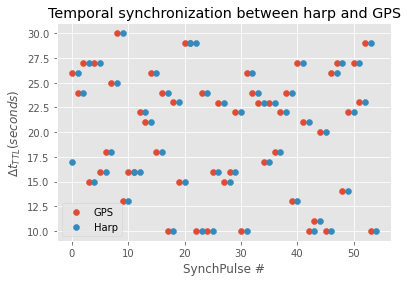

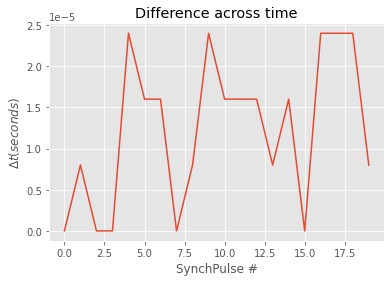

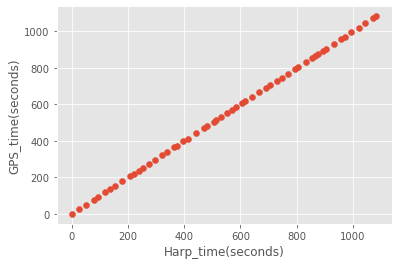

Text(0.5, 1.0, 'b1 = 0.9999986687578337\nb0 = 0.00031883140002264554\nr2 = 0.9999999999996592')

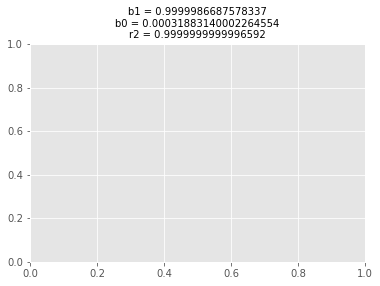

In [46]:
## Plot both
plt.figure()
plt.title("Temporal synchronization between harp and GPS")
plt.scatter(np.arange(len(risingEdgeEvents)-1), np.diff(risingEdgeEvents.values)*1e-3, label = "GPS")
plt.scatter(np.arange(len(harp_sync)-1), np.diff(harp_sync.index.total_seconds()), label = "Harp")
plt.xlabel("SynchPulse #")
plt.ylabel('$\Delta t_{TTL} (seconds)$')
plt.legend()
plt.show()

# We seem to be off by 1 at the start? Maybe come up witha robust way to detect missing ones? some sort of crosscorrelation?
harp_sync_ts = harp_sync[1:].index.total_seconds()
harp_sync_ts = harp_sync_ts - harp_sync_ts[0]
gps_sync_ts = risingEdgeEvents.values*1e-3
gps_sync_ts = gps_sync_ts - gps_sync_ts[0]

plt.figure()
plt.plot((harp_sync_ts - gps_sync_ts)[0:20])
plt.xlabel("SynchPulse #")
plt.ylabel("$\Delta t (seconds)$")
plt.title("Difference across time")
plt.show()

## Another way to do it is to check the regression slope
from scipy import stats
plt.figure()
plt.scatter(harp_sync_ts, gps_sync_ts)
plt.xlabel("Harp_time(seconds)")
plt.ylabel("GPS_time(seconds)")
plt.show()

slope, intercept, r, p, std_err = stats.linregress(harp_sync_ts, gps_sync_ts)
plt.title((f'b1 = {slope}\nb0 = {intercept}\nr2 = {r}'), fontsize = 10)



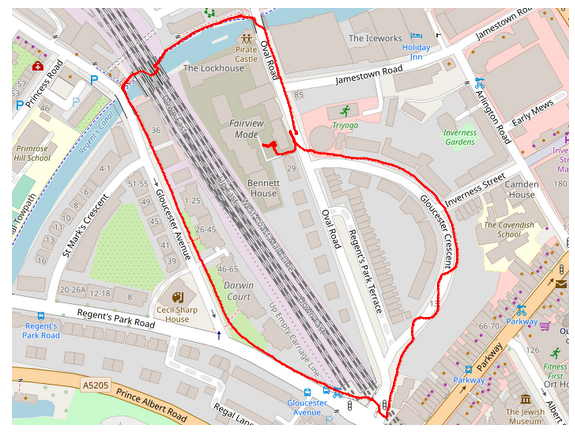

In [47]:
## Plot position data
import geopandas as gpd
import tilemapbase
#tilemapbase.init(create=True) #Must run the first time to create the cache file
NavData = filter_event(ubx_data, "NAV-HPPOSLLH")

NavData.insert(NavData.shape[1], "Lat", NavData.apply(lambda x : x.Message.lat, axis = 1), False)
NavData.insert(NavData.shape[1], "Lon", NavData.apply(lambda x : x.Message.lon, axis = 1), False)
NavData.insert(NavData.shape[1], "Height", NavData.apply(lambda x : x.Message.height, axis = 1), False)
NavData.insert(NavData.shape[1], "Time", NavData.apply(lambda x : x.Message.iTOW, axis = 1), False)

coord = gpd.points_from_xy(NavData['Lon'], NavData['Lat'], NavData['Height'])
gdf = gpd.GeoDataFrame(geometry=coord, crs='epsg:4326')

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
tiles = tilemapbase.tiles.build_OSM()
extent = tilemapbase.Extent.from_lonlat(np.min(NavData['Lon'].values), np.max(NavData['Lon'].values),
                                        np.min(NavData['Lat'].values), np.max(NavData['Lat'].values))
extent = extent.to_aspect(4/3).with_scaling(0.6)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plotter = tilemapbase.Plotter(extent, tiles, width=600)
plotter.plot(ax)

path = [tilemapbase.project(x,y) for x,y in zip(NavData['Lon'].values, NavData['Lat'].values)]
x, y = zip(*path)

#ax.scatter(point[0], point[1], c = 'r', s = 200)
ax.plot(x,y,"ro-", markersize=1)
plt.show()




In [48]:
# Find messages with different lengths
groups = ['Class', 'Id']
for name, groupdf in ubx_data.groupby(groups):
    un = np.unique(groupdf["Length"].values)
    if len(un) > 1:
        print(name, un)


('ESF', 'MEAS') [16 24 28]
('NAV', 'ORB') [488 494 500]
('NAV', 'SAT') [272 284 296 308]
('NAV', 'SBAS') [ 12 264 276 288 300 312]
('NAV', 'SIG') [584 600 616 632 648 664 680 696 712 728]
('RXM', 'MEASX') [452 476 500 524 548 572 596 620 644 668 692 716 740 764 788 812 836 860
 884 908 932]
('RXM', 'RAWX') [ 432  464  496  528  560  592  624  656  688  720  752  784  816  848
  880  912  944  976 1008 1040 1072 1104 1136 1168]
('RXM', 'SFRBX') [40 44 48]


In [49]:
#http://docs.ros.org/en/kinetic/api/ublox_msgs/html/msg/EsfMEAS.html
#https://cdn.sparkfun.com/assets/learn_tutorials/1/1/7/2/ZED-F9R_Interfacedescription__UBX-19056845_.pdf  @page 57
#integration document @p36 https://content.u-blox.com/sites/default/files/ZED-F9R_Integrationmanual_UBX-20039643.pdf?hash=undefined&_ga=2.212516247.229517523.1660666345-1786438948.1649933107
#dataType = 5 : z-axis gyroscope angular rate deg/s *2^-12 (signed 24bit)
#dataType = 11 : speed m/s * 1e-3 (signed)
#dataType = 12 : Gyro temperature (deg celsiues 1e-2) signed
#dataType = 13 : y-axis gyroscope angular rate deg/s *2^-12 (signed 24bit)
#dataType = 14 : x-axis gyroscope angular rate  deg/s *2^-12 (signed 24bit)
#dataType = 16 : Gyro x acc (m/s^2 *2^-10) signed
#dataType = 17 : Gyro y acc (m/s^2 *2^-10) signed
#dataType = 18 : Gyro z acc (m/s^2 *2^-10) signed

#def get_gyro_from_ubx(message):
#    return pd.Series([e, f, g])

## Parse accelarometer data

ESF_MEAS = filter_event(ubx_data, "ESF-MEAS")

_dataTypeDict = {
    5 : 'angular_rate_z',
    8 : 'left_wheel_tick',
    9 : 'right_wheel_tick',
    10 : 'speed_tick',
    11 : 'speed',
    12: 'temperature',
    13 : 'angular_rate_y',
    14 : 'angular_rate_x',
    16 : 'gyro_acc_x',
    17 : 'gyro_acc_y',
    18 : 'gyro_acc_z'
}

[ESF_MEAS.assign(x = np.NAN) for x in _dataTypeDict.values()]


for ii, row in ESF_MEAS.iterrows():
    message = row['Message']
    n = message.numMeas
    for i in range(n):
        datatype = getattr(message, f'dataType_0{i+1}')
        datafield = getattr(message, f'dataField_0{i+1}')
        ESF_MEAS.loc[ii,_dataTypeDict[datatype]] = datafield
print(ESF_MEAS)


C:\Users\bfpcr\AppData\Local\Temp\ipykernel_17860\1746247369.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESF_MEAS.loc[ii,_dataTypeDict[datatype]] = datafield
C:\Users\bfpcr\AppData\Local\Temp\ipykernel_17860\1746247369.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ESF_MEAS.loc[ii,_dataTypeDict[datatype]] = datafield
C:\Users\bfpcr\AppData\Local\Temp\ipykernel_17860\1746247369.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

                                                        Message  Identity  \
Seconds                                                                     
14326.308992  <UBX(ESF-MEAS, timeTag=14330498, timeMarkSent=...  ESF-MEAS   
14326.308992  <UBX(ESF-MEAS, timeTag=14330493, timeMarkSent=...  ESF-MEAS   
14326.328992  <UBX(ESF-MEAS, timeTag=14330518, timeMarkSent=...  ESF-MEAS   
14326.328992  <UBX(ESF-MEAS, timeTag=14330513, timeMarkSent=...  ESF-MEAS   
14326.348992  <UBX(ESF-MEAS, timeTag=14330538, timeMarkSent=...  ESF-MEAS   
...                                                         ...       ...   
15453.433984  <UBX(ESF-MEAS, timeTag=15457622, timeMarkSent=...  ESF-MEAS   
15453.433984  <UBX(ESF-MEAS, timeTag=15457617, timeMarkSent=...  ESF-MEAS   
15453.452992  <UBX(ESF-MEAS, timeTag=15457661, timeMarkSent=...  ESF-MEAS   
15453.456992  <UBX(ESF-MEAS, timeTag=15457642, timeMarkSent=...  ESF-MEAS   
15453.456992  <UBX(ESF-MEAS, timeTag=15457637, timeMarkSent=...  ESF-MEAS   

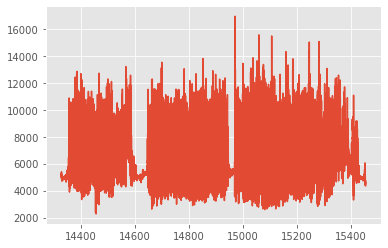

,Message,Identity,Class,Id,Length,gyro_acc_x,gyro_acc_y,gyro_acc_z,angular_rate_x,angular_rate_y,angular_rate_z,temperature,speed_tick
Seconds,,,,,,,,,,,,,
14326.308992,"<UBX(ESF-MEAS, timeTag=14330498, timeMarkSent=...",ESF-MEAS,ESF,MEAS,24,8597.0,413.0,4941.0,15828.0,18107.0,16771955.0,3978.0,NaN
14326.308992,"<UBX(ESF-MEAS, timeTag=14330493, timeMarkSent=...",ESF-MEAS,ESF,MEAS,28,8597.0,413.0,4941.0,15828.0,18107.0,16771955.0,3978.0,NaN
14326.328992,"<UBX(ESF-MEAS, timeTag=14330518, timeMarkSent=...",ESF-MEAS,ESF,MEAS,24,8575.0,404.0,5052.0,22056.0,17123.0,16776029.0,3978.0,NaN
14326.328992,"<UBX(ESF-MEAS, timeTag=14330513, timeMarkSent=...",ESF-MEAS,ESF,MEAS,28,8575.0,404.0,5052.0,22056.0,17123.0,16776029.0,3978.0,NaN
14326.348992,"<UBX(ESF-MEAS, timeTag=14330538, timeMarkSent=...",ESF-MEAS,ESF,MEAS,24,8576.0,423.0,4989.0,28362.0,17373.0,1669.0,3977.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15453.414976,"<UBX(ESF-MEAS, timeTag=15457597, timeMarkSent=...",ESF-MEAS,ESF,MEAS,28,8864.0,762.0,4415.0,13158.0,2341.0,16775343.0,4347.0,NaN
15453.433984,"<UBX(ESF-MEAS, timeTag=15457622, timeMarkSent=...",ESF-MEAS,ESF,MEAS,24,8838.0,772.0,4399.0,12659.0,2715.0,16774672.0,4350.0,NaN
15453.433984,"<UBX(ESF-MEAS, timeTag=15457617, timeMarkSent=...",ESF-MEAS,ESF,MEAS,28,8838.0,772.0,4399.0,12659.0,2715.0,16774672.0,4350.0,NaN


In [56]:
acc = ESF_MEAS[~ESF_MEAS["gyro_acc_z"].isnull()]

plt.figure()
plt.plot(acc.index.values, acc.gyro_acc_z.values)
plt.show()

acc

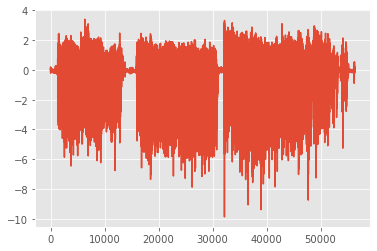

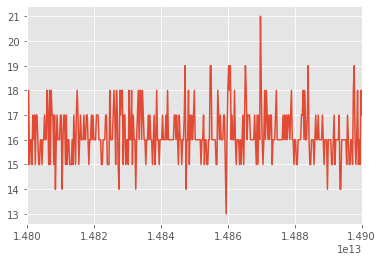

56357 4508


In [15]:
#Read accelarometer from HARP
Accelarometer_data = ecu.load_accelarometer(stream_root_folder + "\\" + "Accelarometer.csv", header = None)
plt.figure()
plt.plot(Accelarometer_data["LinearAccl.Z"])
plt.show()

## SyncData?

gsr = ecu.read_harp_bin(ecu.get_stream_path("Biodata_GSR",
                        root = stream_root_folder,
                        ext =""))
plt.figure()
plt.plot(gsr)
plt.xlim((1.48e13, 1.49e13))
plt.show()


print(len(Accelarometer_data), len(gsr))



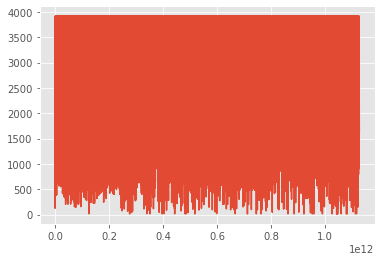

281793


In [16]:
## Load biodata

ecg = ecu.read_harp_bin(ecu.get_stream_path("Biodata_ECG",
                        root = stream_root_folder,
                        ext =""))
ecg.index = (ecg.index - ecg.index[0])
ecg = ecg["Value0"].iloc[np.arange(len(ecg))[::4]].astype(np.float64)
plt.figure()
plt.plot(ecg)
plt.show()
print(len(ecg))


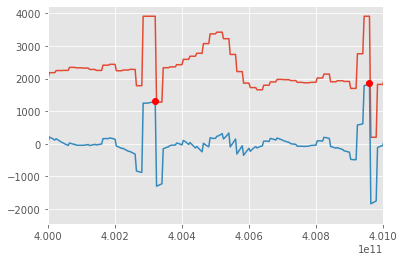

Text(0, 0.5, 'HR(bpm)')

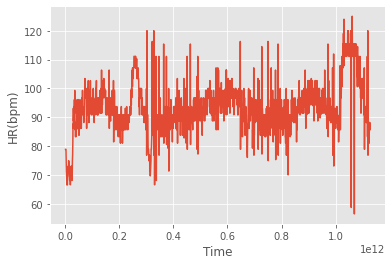

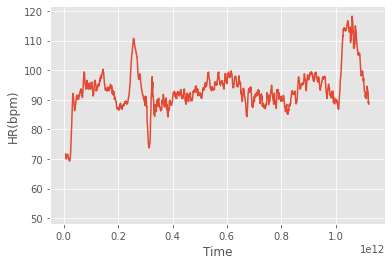

In [18]:
#This should not be necessary as the acquisition rate seems pretty stable, but just in case....
resmaple_rate = datetime.timedelta(seconds = 1.0/250.0) #Period (1/Hz)
resampled = ecg.resample(resmaple_rate).interpolate(method = 'linear')
#High-pass the signal
resampled = ecu.butter_highpass_filter(ecg,5,250.0)

from scipy import signal, convolve
#Assume maximum HR of 300bpm ~ 5Hz ~ 0.2 Seconds
peaks, _  = signal.find_peaks(resampled, height = 800, distance = 0.2 * 250.0 )


plt.figure()
plt.plot(ecg.index, ecg.values)
plt.plot(ecg.index, resampled)
plt.plot(ecg.index[peaks], resampled[peaks], 'ro')
plt.xlim((400e9,401e9))
plt.show()

plt.figure()
HR = (250/np.diff(peaks)) * 60
plt.plot(ecg.index[peaks[1:]], HR)
plt.xlabel("Time")
plt.ylabel("HR(bpm)")

plt.figure()
w = 10
HR = np.convolve(HR, np.ones(w), 'same') / w
HR[0:int(w/2)+1] = np.NaN
HR[-int(w/2)-1:-1] = np.NaN

plt.plot(ecg.index[peaks[1:]], HR)
plt.xlabel("Time")
plt.ylabel("HR(bpm)")
